In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(
    {"figure.figsize": (12, 4)},
    style="ticks",
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=1.2
)

%config InlineBackend.figure_format = "retina"

In [77]:
game_name = "SMB1"
num_steps = "200M"
run_count = "1"

experiment = pd.DataFrame(np.load(f"BTR_{game_name}{num_steps}_{run_count}/BTR_{game_name}{num_steps}Experiment.npy"))
print("experiment shape:", experiment.shape)
evaluation = pd.DataFrame(np.load(f"BTR_{game_name}{num_steps}_{run_count}/BTR_{game_name}{num_steps}Evaluation.npy"))
print("evaluation shape:", evaluation.shape)

experiment shape: (7344, 2)
evaluation shape: (200, 100)


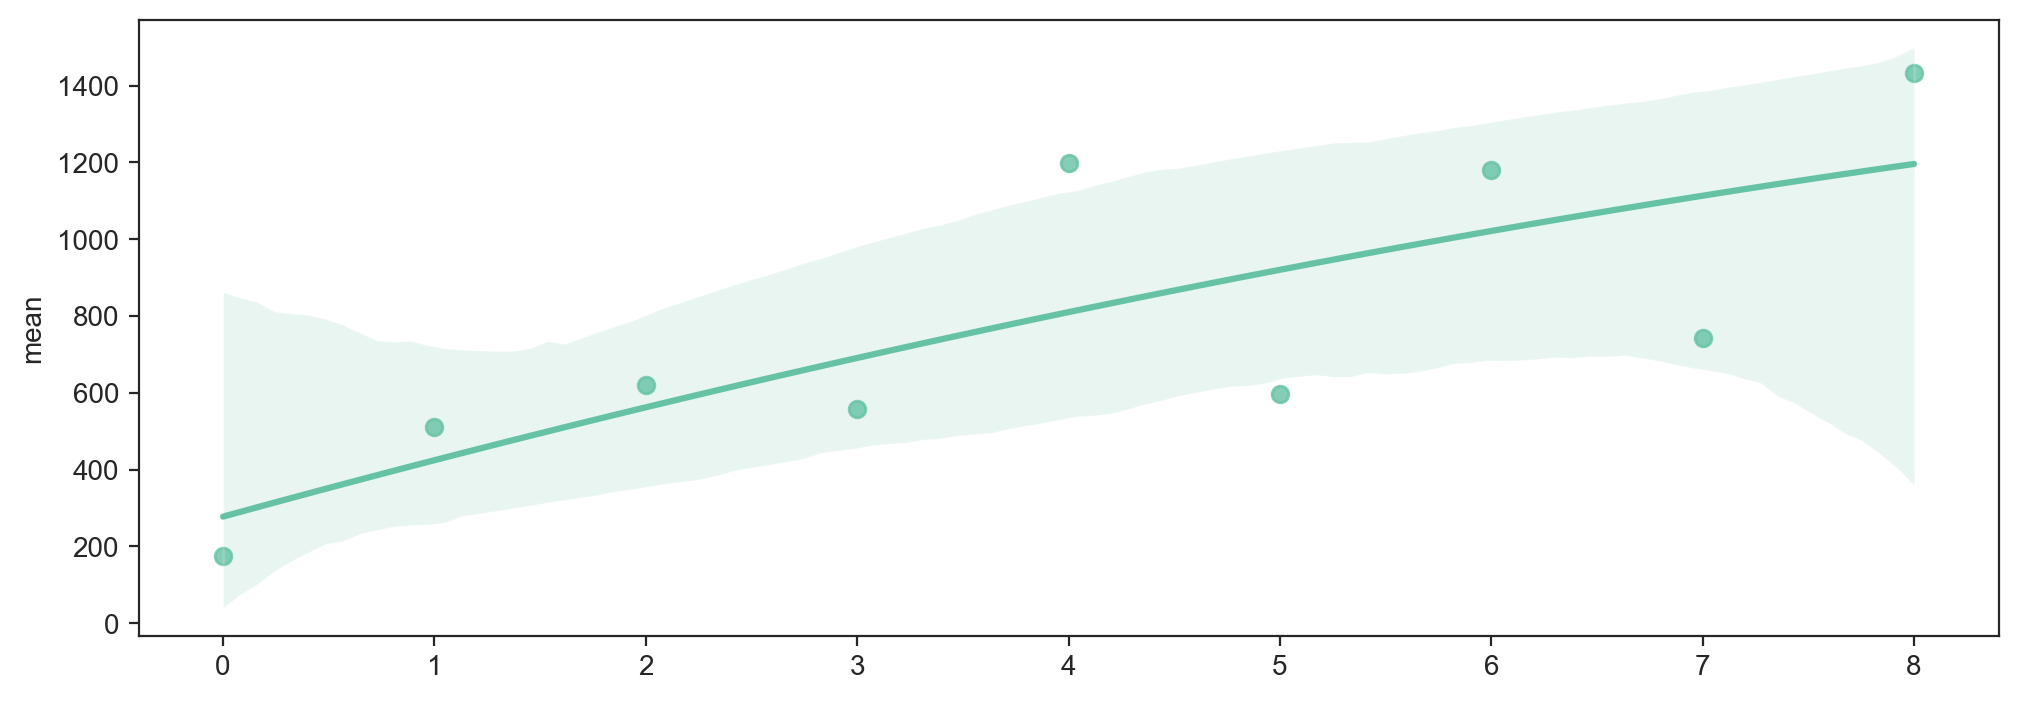

In [78]:
evaluation["mean"] = evaluation.transpose().mean()
eval_mean_scores = evaluation["mean"].loc[evaluation["mean"].replace({0: np.nan}).notna()]
sns.regplot(x=np.arange(len(eval_mean_scores)), y= eval_mean_scores, order=2);

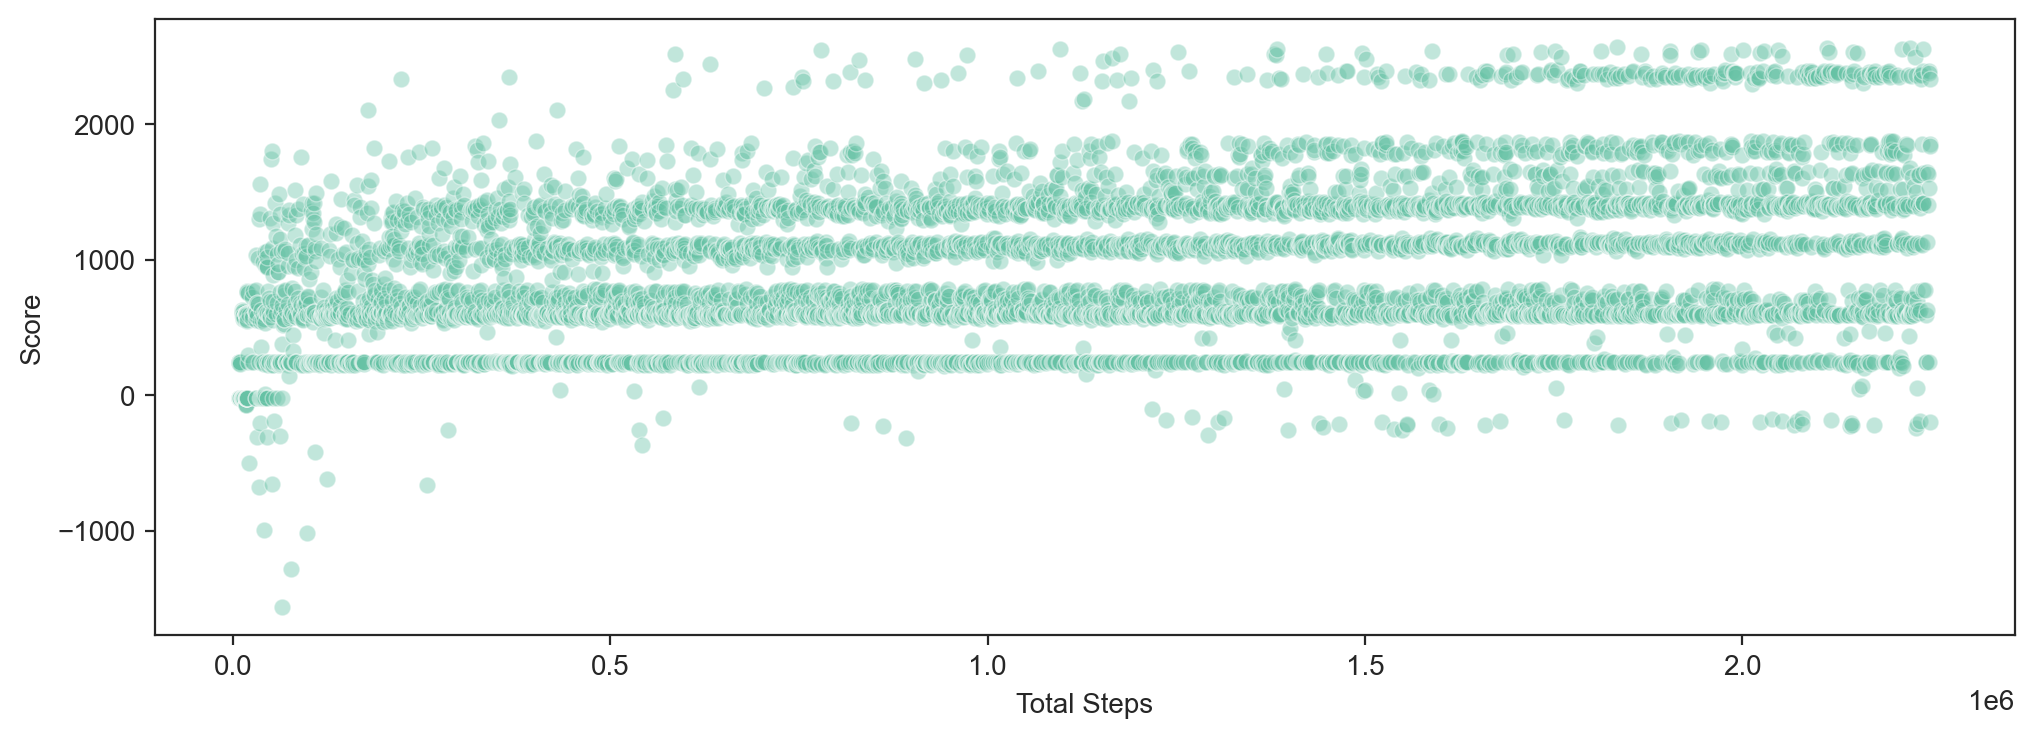

In [79]:
sns.scatterplot(experiment, x=1, y=0, alpha=0.4);
plt.xlabel("Total Steps")
plt.ylabel("Score");

7344


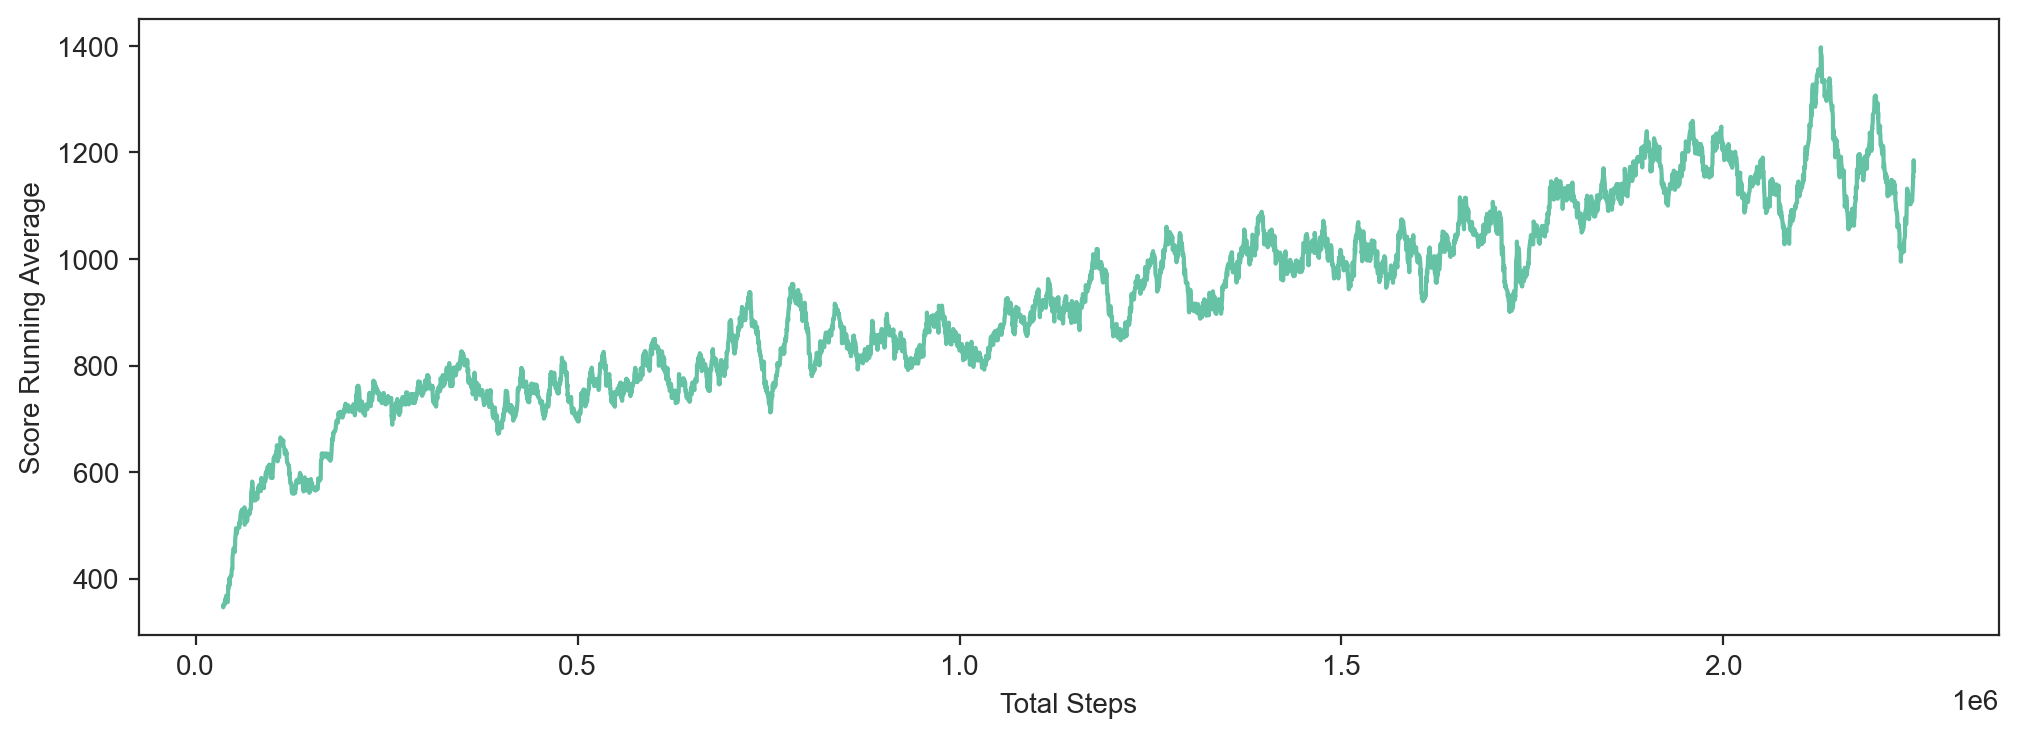

In [80]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

experiment = pd.DataFrame(np.load("BTR_SMB1200M_1/BTR_SMB1200MExperiment.npy"))
print(len(experiment))
scoreRunningAve = moving_average(experiment[0], 100)
plt.plot(experiment[1][len(experiment[1]) - len(scoreRunningAve):], scoreRunningAve);
plt.xlabel("Total Steps")
plt.ylabel("Score Running Average");

In [ ]:
current_ram = [0xEF, 0xCD, 0xAB]

def read_mult_byte(locations:list, endian:str = "big") -> int:
    result = 0
    mult = 1
    if endian not in ["little", "big"]: raise Exception(f"Attempted multi-byte read with invalid endian argument of: '{endian}'. Valid options are 'little' and 'big'.")
    locations = sorted(locations) if endian == "little" else  sorted(locations, reverse=True)
    print(locations)
    for addr in locations:
        result += mult * np.uint64(current_ram[addr])
        mult *= 0x10

    return result

print(f"0x{read_mult_byte([0,1,2], endian="big"):x}")

[2, 1, 0]
0x267
